In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
# torch.manual_seed(17)

# class HaS(object): 
# #     def __init__(self):
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         # possible grid size, 0 means no hiding
#         grid_size=3

#         # hiding probability
#         hide_prob = 0.1
 
#         # randomly choose one grid size
# #         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

#         # hide the patches
#         if(grid_size>0):
#              for x in range(0,wd,grid_size):
#                  for y in range(0,ht,grid_size):
#                      x_end = min(wd, x+grid_size)  
#                      y_end = min(ht, y+grid_size)
#                      if(random.random() <=  hide_prob):
#                            img_[x:x_end,y:y_end,:]=0

#         return img_
    
# torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std

def load_data(is_train,aug,batch_size):
  dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
#   mean, std = get_mean_and_std(dataset)
#   print(mean, std)
  dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
  return dataloader

batch_size = 256 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6
[[[-0.9147032  -0.38956204  0.0274618  ...  0.01201648  0.18191507
    0.15102442]
  [-0.32778072 -0.03431951  0.10468844 ... -0.21966343  0.1973604
    0.2591417 ]
  [-0.09610081  0.29003236  0.24369638 ... -0.6366873  -0.51312464
   -0.32778072]
  ...
  [ 1.0931895   1.2321974   1.448432   ...  0.22825105  0.66072035
    1.6646665 ]
  [ 1.2013068   1.3248694   1.3866507  ... -0.38956204 -0.17332745
    1.1704161 ]
  [ 1.3866507   1.2785335   1.1549708  ... -0.8529219  -0.8065859
    0.7997283 ]]

 [[-1.2393323  -0.8772444  -0.53089947 ... -0.5151565  -0.3419841
   -0.3419841 ]
  [-0.8142726  -0.6725861  -0.5623854  ... -0.68832904 -0.32624117
   -0.29475525]
  [-0.6411001  -0.42069885 -0.45218474 ... -1.003188   -0.9244732
   -0.76704377]
  ...
  [ 0.57110703  0.6813077   0.9804237  ... -0.21604052  0.19327614
    1.2323109 ]
  [ 0.6025929   0.74427944  0.8229942  ... -0.83001554 -0.68832904
    0.6655647 ]
  [ 0.87022305  0.8072512   0.6340788  ... -1.12913

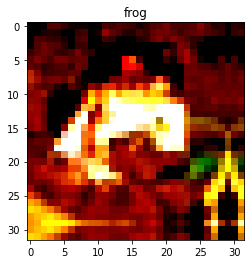

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
image_= np.array(image).copy()
print(image.shape, label)
print(image_)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
# trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
# testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

# images, labels = iter(trainDataLoader).next()
# plt.figure(figsize=(17,8))
# for index in np.arange(0,5):
#   plt.subplot(1,5,index+1)
#   plt.imshow(images[index].numpy().transpose(1,2,0))
#   plt.title(str(classes[labels[index]]))

def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std


In [8]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, in_planes, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = in_planes

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, in_planes, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, in_planes*2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, in_planes*4, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, in_planes*8, num_blocks[3], stride=2)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, self.in_planes*8, num_blocks[3], stride=2)
        self.linear = nn.Linear(1280, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)    

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
#     return ResNet(BasicBlock, [2, 2, 2])
    return ResNet(80, BasicBlock, [3, 3, 2])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4923930


In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [ ]:
num_epochs = 5000 # param
epoch_start = 0
# path = 'adam_rotate_center_crop1.pt'
# path = 'block_3.pt'
path = 'batch_256_lr_0.1-0.0001_no_crop_decay_0.0001_channel_80-5.pt'

train_loss_history = []
test_loss_history = []
test_accuracy_history = []
train_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()
lr = 0.1 # param
lr_min=0.0001
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4) # changable optimizer
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9) # changable optimizer
# optimizer = torch.optim.Adam(model1.parameters(),lr=lr, betas=(0.9,0.999), eps=1e-08, amsgrad=False) # changable optimizer
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov,weight_decay=0.0001)

# torch.cuda.empty_cache()

if os.path.exists(path):
  checkpoint = torch.load(path)
  print('Read model from checkpoint')
  model1.cuda().load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch_start = checkpoint['epoch']
  Loss = checkpoint['Loss']
  train_loss_history = checkpoint['train_loss_history']
  test_loss_history = checkpoint['test_loss_history']
  test_accuracy_history = checkpoint['test_accuracy_history']
  train_accuracy_history = checkpoint['train_accuracy_history']
  print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs + 1):
  timestart = time.time()

  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  train_accuracy = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model1.cuda()(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
    optimizer.step()
    train_loss += fit.item()
    train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model1.cuda()(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  test_accu = test_accuracy/len(testDataLoader)
  train_accu = train_accuracy/len(trainDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accu)
  train_accuracy_history.append(train_accu)
  print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))
  
  if epoch % 5 == 0 and epoch != 0:
    torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'test_accuracy_history':test_accuracy_history,
          'train_accuracy_history':train_accuracy_history},path)
    print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 3595
Epoch 3596, Train loss 0.00027077447840402244, Test loss 0.15326829310506582, Train accuracy 100.0, Test accuracy 95.498046875, Cost 66.14358425140381 s
Epoch 3597, Train loss 0.0002619336730128211, Test loss 0.15251947790384293, Train accuracy 100.0, Test accuracy 95.458984375, Cost 64.45724964141846 s
Epoch 3598, Train loss 0.0002632034263987574, Test loss 0.1514471709728241, Train accuracy 100.0, Test accuracy 95.478515625, Cost 64.48179578781128 s
Epoch 3599, Train loss 0.0002646682839941623, Test loss 0.15156962554901837, Train accuracy 100.0, Test accuracy 95.44921875, Cost 64.54869246482849 s
Epoch 3600, Train loss 0.00026569943344968906, Test loss 0.15015771072357892, Train accuracy 100.0, Test accuracy 95.46875, Cost 64.53459310531616 s
Model saved in epoch 3600
Epoch 3601, Train loss 0.0002723244642580465, Test loss 0.15095309894531966, Train accuracy 100.0, Test accuracy 95.48828125, Cost 64.51774430274963 s
Epoch 3602, Trai

Epoch 3651, Train loss 0.0002843339604382612, Test loss 0.14987601153552532, Train accuracy 100.0, Test accuracy 95.615234375, Cost 64.69223070144653 s
Epoch 3652, Train loss 0.0002779103158492053, Test loss 0.1497041504830122, Train accuracy 100.0, Test accuracy 95.56640625, Cost 64.6731550693512 s
Epoch 3653, Train loss 0.0002820747179853521, Test loss 0.14982595723122358, Train accuracy 100.0, Test accuracy 95.634765625, Cost 64.65177273750305 s
Epoch 3654, Train loss 0.0002788094719349198, Test loss 0.15014639049768447, Train accuracy 100.0, Test accuracy 95.595703125, Cost 64.66091465950012 s
Epoch 3655, Train loss 0.00029069865625814954, Test loss 0.14881091061979532, Train accuracy 100.0, Test accuracy 95.712890625, Cost 64.61807513237 s
Model saved in epoch 3655
Epoch 3656, Train loss 0.0003037920339883552, Test loss 0.1486571289598942, Train accuracy 100.0, Test accuracy 95.556640625, Cost 64.65524291992188 s
Epoch 3657, Train loss 0.00029243728983731544, Test loss 0.150380032

Epoch 3704, Train loss 0.00026707064297420865, Test loss 0.15285251047462226, Train accuracy 100.0, Test accuracy 95.44921875, Cost 64.66083312034607 s
Epoch 3705, Train loss 0.00027683860441486886, Test loss 0.15416743494570256, Train accuracy 100.0, Test accuracy 95.52734375, Cost 64.669504404068 s
Model saved in epoch 3705
Epoch 3706, Train loss 0.00027018597474849155, Test loss 0.15179488714784384, Train accuracy 100.0, Test accuracy 95.537109375, Cost 64.71012854576111 s
Epoch 3707, Train loss 0.00027740259225093, Test loss 0.1537685113027692, Train accuracy 100.0, Test accuracy 95.5078125, Cost 64.67824053764343 s
Epoch 3708, Train loss 0.0002695848266665387, Test loss 0.15319801215082407, Train accuracy 100.0, Test accuracy 95.5078125, Cost 64.6728584766388 s
Epoch 3709, Train loss 0.00028344651649121614, Test loss 0.15140049196779728, Train accuracy 100.0, Test accuracy 95.56640625, Cost 64.68467998504639 s
Epoch 3710, Train loss 0.000271737741764364, Test loss 0.15331452637910

Epoch 3755, Train loss 0.0016716598745136122, Test loss 0.22571779061108826, Train accuracy 99.96412627551021, Test accuracy 94.47265625, Cost 64.77101230621338 s
Model saved in epoch 3755
Epoch 3756, Train loss 0.001163351985807673, Test loss 0.22281818464398384, Train accuracy 99.98604910714286, Test accuracy 94.62890625, Cost 64.80190300941467 s
Epoch 3757, Train loss 0.000594591705966919, Test loss 0.20437568463385106, Train accuracy 99.99800701530613, Test accuracy 95.2734375, Cost 64.80203080177307 s
Epoch 3758, Train loss 0.0004691343523778154, Test loss 0.2070890637114644, Train accuracy 100.0, Test accuracy 94.990234375, Cost 64.7844648361206 s
Epoch 3759, Train loss 0.0003565807645809029, Test loss 0.2101249847561121, Train accuracy 100.0, Test accuracy 95.146484375, Cost 64.78739738464355 s
Epoch 3760, Train loss 0.00036491663050416105, Test loss 0.2080275435000658, Train accuracy 99.99800701530613, Test accuracy 95.048828125, Cost 64.8041501045227 s
Model saved in epoch 376

Epoch 3807, Train loss 0.00018924537913075516, Test loss 0.17658968474715947, Train accuracy 100.0, Test accuracy 95.439453125, Cost 64.76762223243713 s
Epoch 3808, Train loss 0.00019555014255367534, Test loss 0.1761974034830928, Train accuracy 100.0, Test accuracy 95.498046875, Cost 64.72056818008423 s
Epoch 3809, Train loss 0.00019682957667546176, Test loss 0.1781589187681675, Train accuracy 100.0, Test accuracy 95.439453125, Cost 64.7178168296814 s
Epoch 3810, Train loss 0.00020517896437199018, Test loss 0.17698182836174964, Train accuracy 100.0, Test accuracy 95.390625, Cost 64.7132179737091 s
Model saved in epoch 3810
Epoch 3811, Train loss 0.00020381855173749202, Test loss 0.17569182626903057, Train accuracy 100.0, Test accuracy 95.400390625, Cost 64.61219525337219 s
Epoch 3812, Train loss 0.00019683536150723183, Test loss 0.1775427082553506, Train accuracy 100.0, Test accuracy 95.400390625, Cost 64.67570400238037 s
Epoch 3813, Train loss 0.00020510194279230913, Test loss 0.17598

Epoch 3860, Train loss 0.0002591120847144487, Test loss 0.16883814595639707, Train accuracy 100.0, Test accuracy 95.3125, Cost 64.63632774353027 s
Model saved in epoch 3860
Epoch 3861, Train loss 0.0002619629507980604, Test loss 0.16744358744472265, Train accuracy 100.0, Test accuracy 95.361328125, Cost 64.63220739364624 s
Epoch 3862, Train loss 0.0002501789209900937, Test loss 0.16716282293200493, Train accuracy 100.0, Test accuracy 95.41015625, Cost 64.92119550704956 s
Epoch 3863, Train loss 0.00026672459100563156, Test loss 0.16862028520554304, Train accuracy 100.0, Test accuracy 95.283203125, Cost 64.947829246521 s
Epoch 3864, Train loss 0.00025627611485477396, Test loss 0.16655613016337156, Train accuracy 100.0, Test accuracy 95.400390625, Cost 64.93859624862671 s
Epoch 3865, Train loss 0.00025680131496913847, Test loss 0.1654565054923296, Train accuracy 100.0, Test accuracy 95.3515625, Cost 64.94454646110535 s
Model saved in epoch 3865
Epoch 3866, Train loss 0.0002645297557749899

Epoch 3913, Train loss 0.0002658765932915694, Test loss 0.16349926684051752, Train accuracy 100.0, Test accuracy 95.380859375, Cost 65.18025851249695 s
Epoch 3914, Train loss 0.0002754146901549705, Test loss 0.16392908226698638, Train accuracy 100.0, Test accuracy 95.29296875, Cost 65.13252830505371 s
Epoch 3915, Train loss 0.0002704298260549858, Test loss 0.16477430500090123, Train accuracy 100.0, Test accuracy 95.29296875, Cost 65.17917799949646 s
Model saved in epoch 3915
Epoch 3916, Train loss 0.00026531002694522317, Test loss 0.1628613794222474, Train accuracy 100.0, Test accuracy 95.3125, Cost 65.27848553657532 s
Epoch 3917, Train loss 0.00029532459413939233, Test loss 0.1622368784621358, Train accuracy 100.0, Test accuracy 95.302734375, Cost 65.14916181564331 s
Epoch 3918, Train loss 0.00027217068945530477, Test loss 0.16178280990570784, Train accuracy 100.0, Test accuracy 95.322265625, Cost 65.14280033111572 s
Epoch 3919, Train loss 0.00028191565048027954, Test loss 0.161868816

Epoch 3966, Train loss 0.00025670136320903633, Test loss 0.16222622375935317, Train accuracy 100.0, Test accuracy 95.33203125, Cost 64.85335612297058 s
Epoch 3967, Train loss 0.0002659831487256511, Test loss 0.16267868168652058, Train accuracy 100.0, Test accuracy 95.322265625, Cost 64.80748534202576 s
Epoch 3968, Train loss 0.0002656424034544865, Test loss 0.16245652232319116, Train accuracy 100.0, Test accuracy 95.33203125, Cost 64.80022978782654 s
Epoch 3969, Train loss 0.0002595158965013237, Test loss 0.16339808087795973, Train accuracy 100.0, Test accuracy 95.322265625, Cost 64.7902238368988 s
Epoch 3970, Train loss 0.00025737264914656703, Test loss 0.16290652062743902, Train accuracy 100.0, Test accuracy 95.33203125, Cost 64.8065550327301 s
Model saved in epoch 3970
Epoch 3971, Train loss 0.0002588196737039597, Test loss 0.16480207331478597, Train accuracy 100.0, Test accuracy 95.2734375, Cost 64.82490706443787 s
Epoch 3972, Train loss 0.000267579458263104, Test loss 0.1637973112

Epoch 4019, Train loss 0.0002528306751479917, Test loss 0.16664078813046218, Train accuracy 100.0, Test accuracy 95.380859375, Cost 64.75546717643738 s
Epoch 4020, Train loss 0.00025449197502374385, Test loss 0.16781385857611894, Train accuracy 100.0, Test accuracy 95.185546875, Cost 64.75413393974304 s
Model saved in epoch 4020
Epoch 4021, Train loss 0.00024421074006252696, Test loss 0.1671501588076353, Train accuracy 100.0, Test accuracy 95.37109375, Cost 64.73701238632202 s
Epoch 4022, Train loss 0.0002456910729144548, Test loss 0.16686372719705106, Train accuracy 100.0, Test accuracy 95.400390625, Cost 64.7165060043335 s
Epoch 4023, Train loss 0.0002472753869221137, Test loss 0.16751786787062883, Train accuracy 100.0, Test accuracy 95.3125, Cost 64.68541026115417 s
Epoch 4024, Train loss 0.00025539719658530775, Test loss 0.1721544111147523, Train accuracy 100.0, Test accuracy 95.0390625, Cost 64.67480063438416 s
Epoch 4025, Train loss 0.0002722816719383724, Test loss 0.170131342858

In [ ]:
num_epochs = 500
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Train accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [ ]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)